In [1]:
import pandas as pd
import numpy as np
import os
import math
import functools
# import holoviews as hv
# from holoviews import opts
# from holoviews.operation import contours
# hv.extension('matplotlib')
# hv.extension('bokeh')
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from pandas import HDFStore
import time
import sys
sys.path.insert(0, "..")
from scipy.optimize import curve_fit
from scipy.stats import norm, kurtosis
import scipy.stats as stats
from scipy.stats import kurtosis

In [2]:
files = glob('./VEP/*')

In [39]:
for file in files[0:1]:
    VEP = pd.read_hdf(file,'table')
    VEP['ang'] = VEP['ang'].astype(np.float64)
    print(VEP.head(3))
    
    VEP['x'] = VEP['dis'] * np.cos(np.radians(VEP['ang']))
    VEP['y'] = VEP['dis'] * np.sin(np.radians(VEP['ang']))
    VEP = VEP.drop(['dis','ang'],axis=1)
    VEP[['x','y']] = (VEP[['x','y']]).round(1)
    # VEP = VEP[VEP.duplicated(subset=['x','y'], keep=False)]
    print(VEP.head(3))

    dis      ang    VE
0  0.36  0.10986  4.74
1  0.39  0.10986  5.88
2  0.42  0.10986  5.68
     VE    x    y
0  4.74  0.4  0.0
1  5.88  0.4  0.0
2  5.68  0.4  0.0


In [40]:
vep_map = pd.pivot_table(VEP, values='VE', index=['x'],
                    columns=['y'])
vep_map.notnull().sum().head()

y
-3.5    10
-3.4    19
-3.3    25
-3.2    30
-3.1    33
dtype: int64

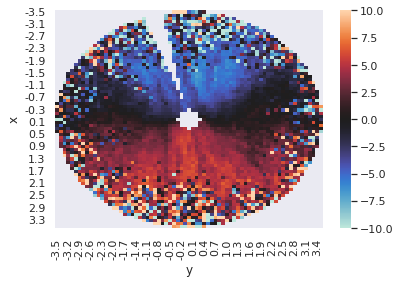

In [41]:
ax = sns.heatmap(vep_map, center=0, vmin=-10, vmax=10, mask = vep_map.isnull())